# Zajęcie 3 (2024)

In [23]:
#pip install numpy pandas matplotlib seaborn scikit-learn

# PCA i wizualizacja skupień

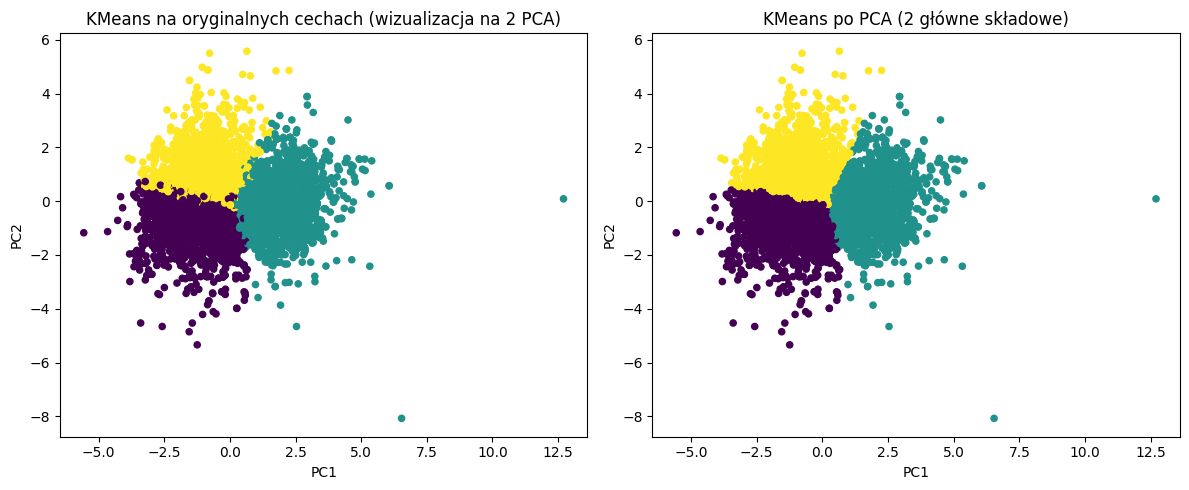

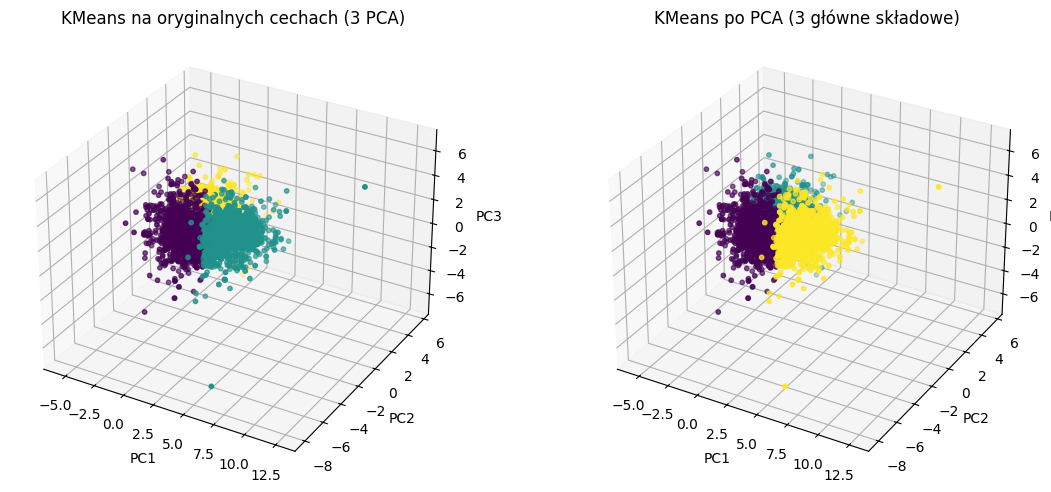

Silhouette score (oryginalne cechy): 0.144
Silhouette score (PCA 2D): 0.377
Silhouette score (PCA 3D): 0.286


In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wczytanie danych
data = pd.read_csv('winequality-white.csv', sep=';')
X = data.drop('quality', axis=1).values

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Klasteryzacja k-means na oryginalnych danych
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)

# Redukcja wymiarowosci do 2 i 3 głównych składowych
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

# Klasteryzacja k-means po PCA (2D i 3D)
kmeans_pca2 = KMeans(n_clusters=3, random_state=42)
labels_pca2 = kmeans_pca2.fit_predict(X_pca2)
kmeans_pca3 = KMeans(n_clusters=3, random_state=42)
labels_pca3 = kmeans_pca3.fit_predict(X_pca3)

# Wizualizacja skupień na 2 głównych składowych
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_orig, cmap='viridis', s=20)
plt.title('KMeans na oryginalnych cechach (wizualizacja na 2 PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_pca2, cmap='viridis', s=20)
plt.title('KMeans po PCA (2 główne składowe)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

# Wizualizacja skupień na 3 głównych składowych (3D)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=labels_orig, cmap='viridis', s=10)
ax1.set_title('KMeans na oryginalnych cechach (3 PCA)')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=labels_pca3, cmap='viridis', s=10)
ax2.set_title('KMeans po PCA (3 główne składowe)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
plt.tight_layout()
plt.show()

# Porównanie jakości klasteryzacji (opcjonalnie)
from sklearn.metrics import silhouette_score
score_orig = silhouette_score(X_scaled, labels_orig)
score_pca2 = silhouette_score(X_pca2, labels_pca2)
score_pca3 = silhouette_score(X_pca3, labels_pca3)
print(f'Silhouette score (oryginalne cechy): {score_orig:.3f}')
print(f'Silhouette score (PCA 2D): {score_pca2:.3f}')
print(f'Silhouette score (PCA 3D): {score_pca3:.3f}')

# Klasteryzacja k-means

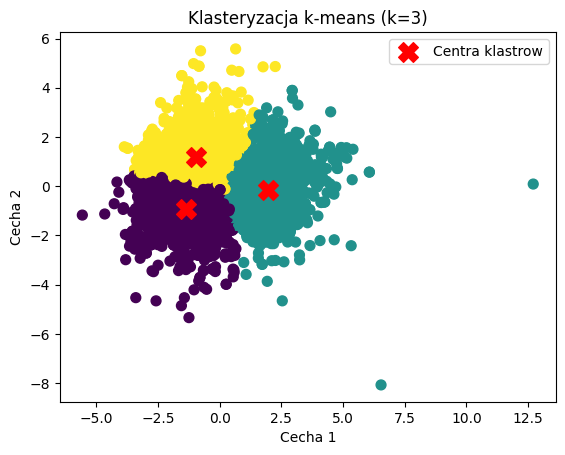

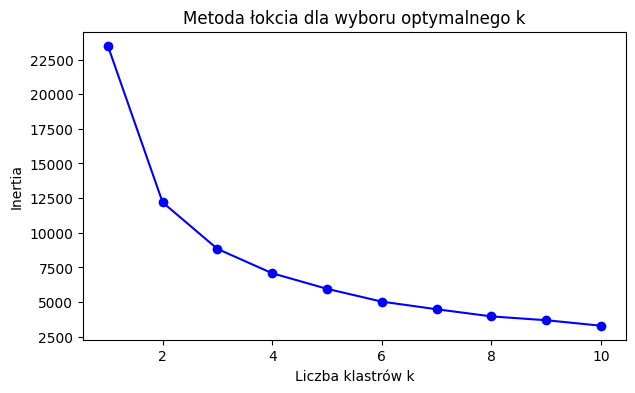

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Wczytaj dane
data = pd.read_csv('winequality-white.csv', sep=';')

# Wybierz cechy numeryczne (bez 'quality')
X = data.drop('quality', axis=1).values

# Standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Redukcja wymiarów do 2D (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Klasteryzacja k-means na danych po PCA
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Wizualizacja wynikow
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centra klastrow')
plt.title(f'Klasteryzacja k-means (k={k})')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend()
plt.show()

# Metoda łokcia
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Liczba klastrów k')
plt.ylabel('Inertia')
plt.title('Metoda łokcia dla wyboru optymalnego k')
plt.show()

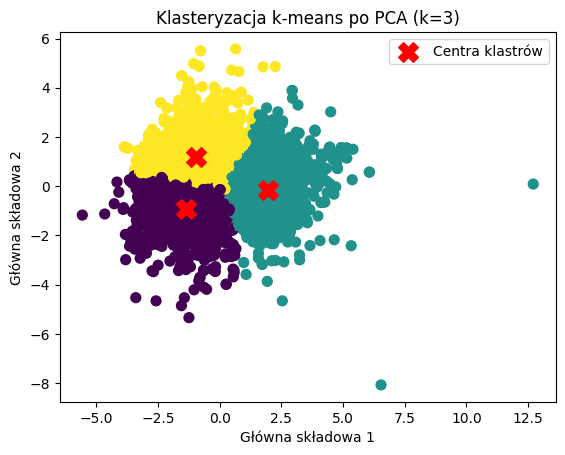

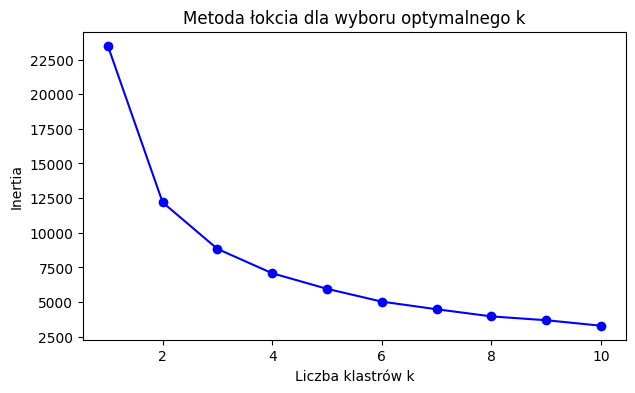

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wczytaj dane
data = pd.read_csv('winequality-white.csv', sep=';')

# Wybierz cechy numeryczne (bez 'quality')
X = data.drop('quality', axis=1).values

# Standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Redukcja wymiarów do 2D (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Klasteryzacja k-means na danych po PCA
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Wizualizacja wyników
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centra klastrów')
plt.title(f'Klasteryzacja k-means po PCA (k={k})')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.legend()
plt.show()

# Metoda łokcia
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Liczba klastrów k')
plt.ylabel('Inertia')
plt.title('Metoda łokcia dla wyboru optymalnego k')
plt.show()



# Klasteryzacja hierarchiczna

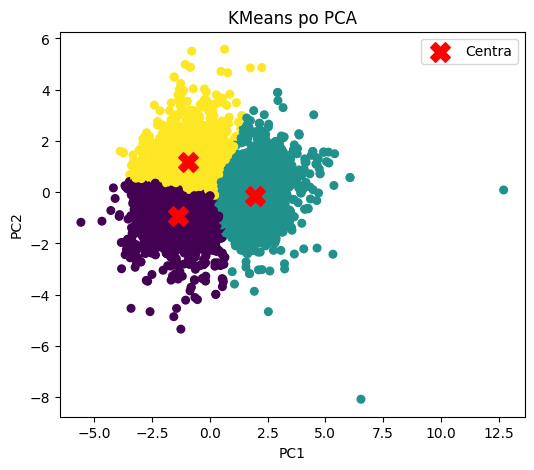

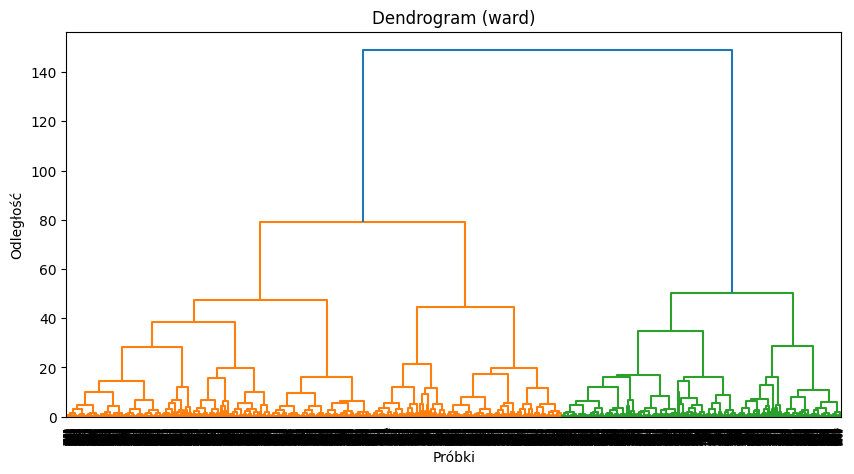

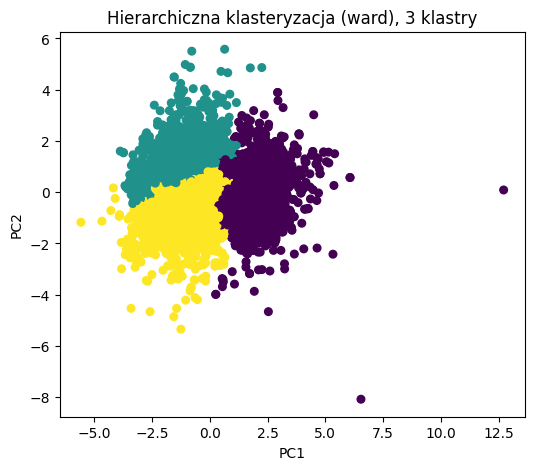

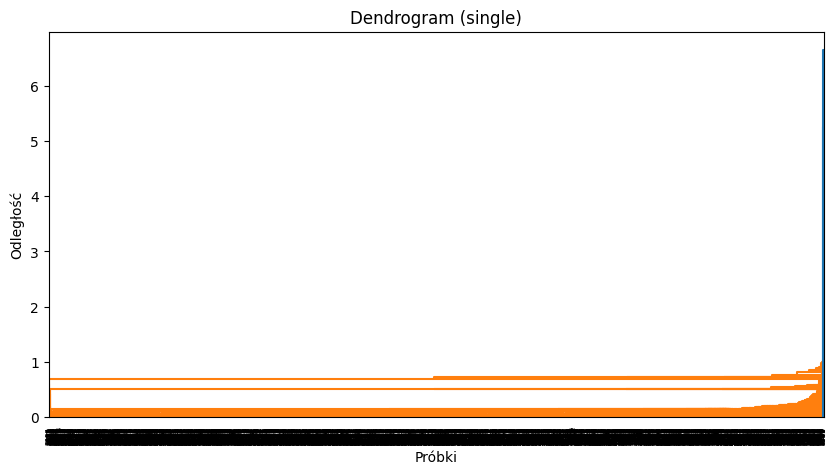

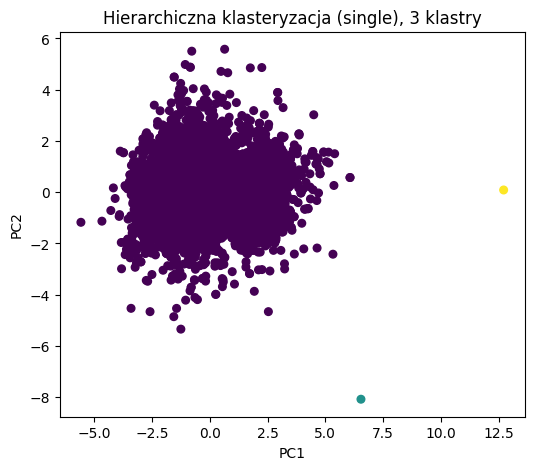

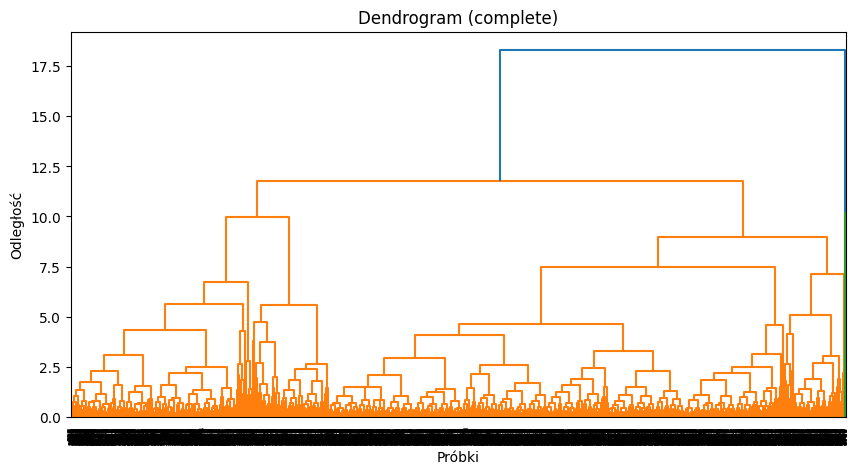

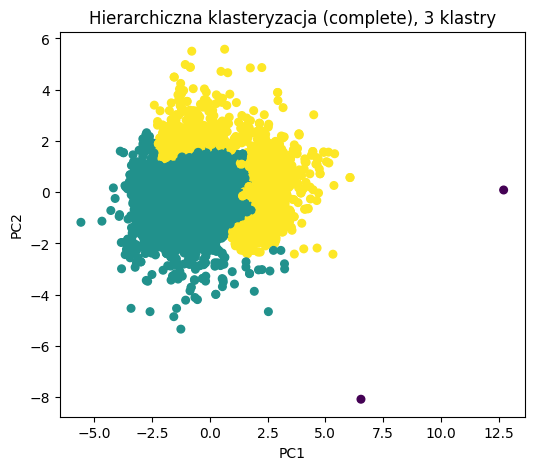

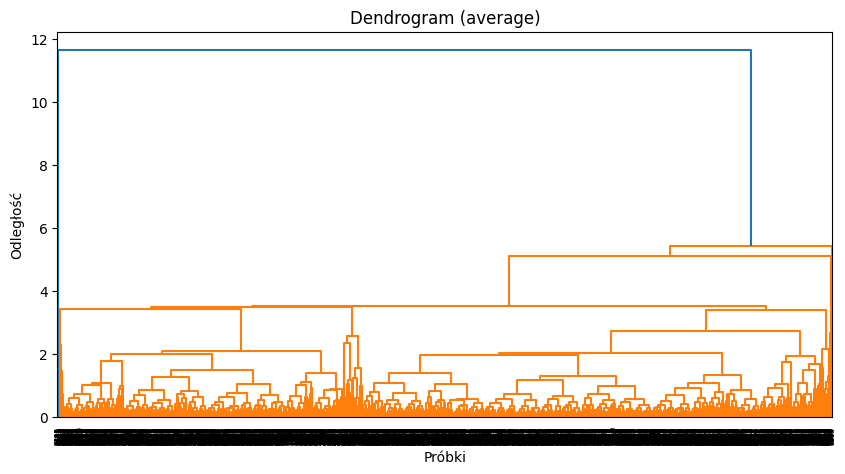

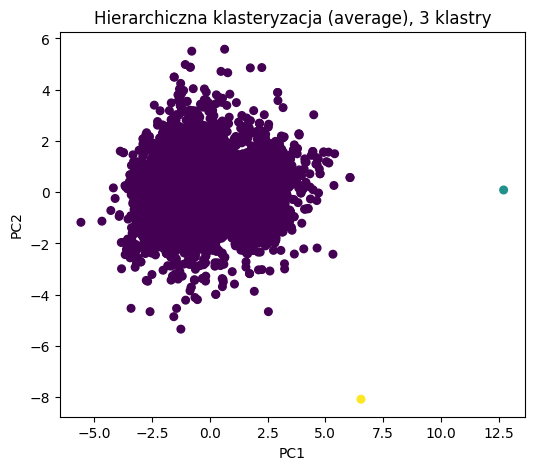

Silhouette score (KMeans): 0.377
Silhouette score (Hierarchiczna ward): 0.356
Silhouette score (Hierarchiczna single): 0.733
Silhouette score (Hierarchiczna complete): 0.305
Silhouette score (Hierarchiczna average): 0.733


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Wczytaj dane
data = pd.read_csv('winequality-white.csv', sep=';')
X = data.drop('quality', axis=1).values
# Standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Redukcja wymiarów do 2D (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Klasteryzacja k-means (dla porównania)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X', s=200, label='Centra')
plt.title('KMeans po PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Klasteryzacja hierarchiczna - różne metody
methods = ['ward', 'single', 'complete', 'average']
for method in methods:
    linked = linkage(X_pca, method=method)
    plt.figure(figsize=(10, 5))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
    plt.title(f'Dendrogram ({method})')
    plt.xlabel('Próbki')
    plt.ylabel('Odległość')
    plt.show()
    # Wyodrębnij 3 klastry
    clusters = fcluster(linked, t=3, criterion='maxclust')
    plt.figure(figsize=(6,5))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=30)
    plt.title(f'Hierarchiczna klasteryzacja ({method}), 3 klastry')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

# Porównanie liczby i kształtu klastrów
from sklearn.metrics import silhouette_score
print(f'Silhouette score (KMeans): {silhouette_score(X_pca, labels_kmeans):.3f}')
for method in methods:
    linked = linkage(X_pca, method=method)
    clusters = fcluster(linked, t=3, criterion='maxclust')
    score = silhouette_score(X_pca, clusters)
    print(f'Silhouette score (Hierarchiczna {method}): {score:.3f}')

    